In [3]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
with open('../data/TG_STAID002759.txt') as f:
    df = pd.read_csv('../data/TG_STAID002759.txt',decimal=',',skiprows=range(0,18),parse_dates=True)
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('___','').str.replace('_','')
    df['date']=pd.to_datetime(df['date'].astype('str'),format ='%Y%m%d')

In [3]:
df.head()

,souid,date,tg,qtg
0,127488,1876-01-01,22,0
1,127488,1876-01-02,25,0
2,127488,1876-01-03,3,0
3,127488,1876-01-04,-58,0
4,127488,1876-01-05,-98,0


In [4]:
def df_transform(df): 
    '''transform df, adding time features'''
    df['month']=df.iloc[:,1].dt.month
    df['year'] = df.iloc[:,1].dt.year
    df['day'] = df.iloc[:,1].dt.day
    df['hour'] = df.iloc[:,1].dt.hour
    #df['datetime'] = pd.to_datetime(df['date'])
    df=df.set_index(keys = 'date', drop = False, append = False, 
                   #verify_integrity=10, improve the performance
                  )
    #df['datetime']= [time.mktime(df['datetime'][i].timetuple())/10**8 for i in range(df.shape[0])]
    return df
df = df_transform(df)

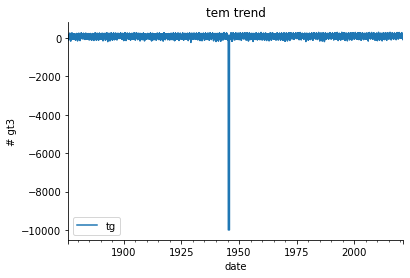

In [5]:
def plot_temp(df,title,ylim=True):
    # pandas plotting, it is easier
    
    df.plot()
    plt.title(title)
    #plt.xlabel('')
    sns.despine()
    plt.ylabel('# gt3')
    #if ylim:
        #plt.ylim(ymin = 0)
plot_temp(df[['tg']],'tem trend')

# data exploration

In [6]:
df_to_explore = df.loc[(df['year']>=2000)]      #df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

In [7]:
df_to_explore.set_index('date', inplace = True)

In [8]:
df_to_explore['timestamp']=range(len(df_to_explore['year'])) # lr does not accept date as X, create timestamp for time.

<ipython-input-8-ea20b113ee1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_explore['timestamp']=range(len(df_to_explore['year'])) # lr does not accept date as X, create timestamp for time.


In [9]:
df_to_explore.head(5)

,souid,tg,qtg,month,year,day,hour,timestamp
date,,,,,,,,
2000-01-01,111448,14,0,1,2000,1,0,0
2000-01-02,111448,39,0,1,2000,2,0,1
2000-01-03,111448,59,0,1,2000,3,0,2
2000-01-04,111448,53,0,1,2000,4,0,3
2000-01-05,111448,30,0,1,2000,5,0,4


In [10]:
from sklearn.linear_model import LinearRegression

<ipython-input-11-8c09887eacac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_explore['trend']=train_model(X,y, model)


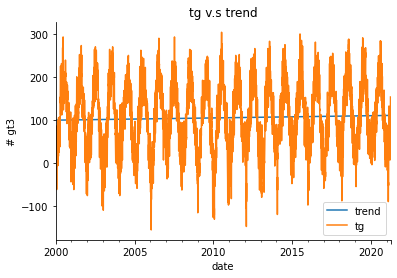

In [11]:
def train_model(X,y, model, **kwargs):
    m = model
    m.fit(X,y)
    pred = m.predict(X)
    return pred

X = df_to_explore[['timestamp']]
y = df_to_explore['tg']
model = LinearRegression()    
df_to_explore['trend']=train_model(X,y, model)
plot_temp(df_to_explore[['trend','tg']],'tg v.s trend')

In [12]:
season_feature = pd.get_dummies(df_to_explore['month'],prefix='month').set_index(df_to_explore.index)

In [23]:
season_feature.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,
2000-01-01,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-02,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-03,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-04,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-05,1,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_to_explore_s = df_to_explore.join(season_feature)

In [22]:
df_to_explore_s.head(5)

,souid,tg,qtg,month,year,day,hour,timestamp,trend,month_1,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonality
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,111448,14,0,1,2000,1,0,0,99.974740,1,...,0,0,0,0,0,0,0,0,0,11.46875
2000-01-02,111448,39,0,1,2000,2,0,1,99.976161,1,...,0,0,0,0,0,0,0,0,0,11.46875
2000-01-03,111448,59,0,1,2000,3,0,2,99.977581,1,...,0,0,0,0,0,0,0,0,0,11.46875
2000-01-04,111448,53,0,1,2000,4,0,3,99.979001,1,...,0,0,0,0,0,0,0,0,0,11.46875
2000-01-05,111448,30,0,1,2000,5,0,4,99.980422,1,...,0,0,0,0,0,0,0,0,0,11.46875


In [19]:
X = df_to_explore_s.drop(columns=['souid', 'tg', 'qtg', 'month', 'year', 'day', 'hour', 'timestamp',
       'trend'])
y = df_to_explore_s['tg']
model = LinearRegression()
train_model(X,y,model)

array([11.46875, 11.46875, 11.46875, ..., 52.34375, 52.34375, 52.34375])

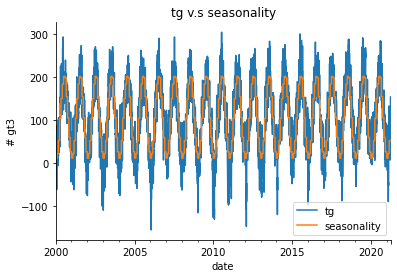

In [20]:
df_to_explore_s['seasonality']=train_model(X,y, model)
plot_temp(df_to_explore_s[['tg','seasonality']],'tg v.s seasonality')

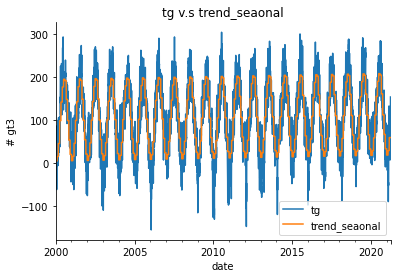

In [66]:
X = df_to_explore_s.drop(columns=['souid', 'tg', 'qtg', 'month', 'year', 'day', 'hour',
       'trend'])
y = df_to_explore_s['tg']
model = LinearRegression()
df_to_explore_s['trend_seaonal']=train_model(X,y,model)
plot_temp(df_to_explore_s[['tg','trend_seaonal']],'tg v.s trend_seaonal')

In [67]:
df_to_explore_s['remainder'] = df_to_explore_s['trend']-df_to_explore_s['trend_seaonal']

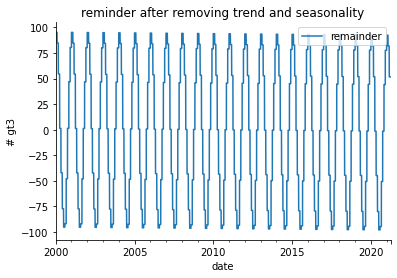

In [68]:
plot_temp(df_to_explore_s[['remainder']],'reminder after removing trend and seasonality')

In [75]:
df_to_explore_s['noise'] = np.random.normal(size = len(df_to_explore_s), scale = 25)

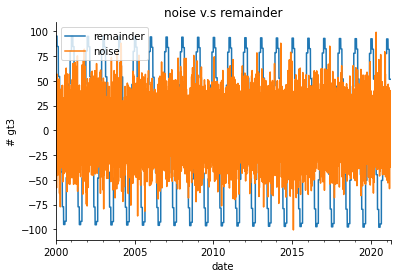

In [78]:
plot_temp(df_to_explore_s[['remainder','noise']],'noise v.s remainder')

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
d = seasonal_decompose(df_to_explore['tg'], model = 'additive', period = 12)

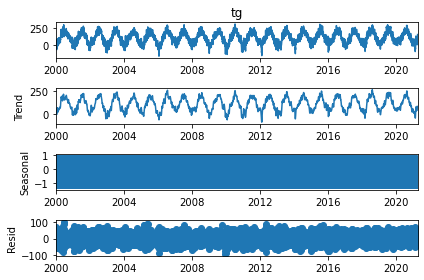

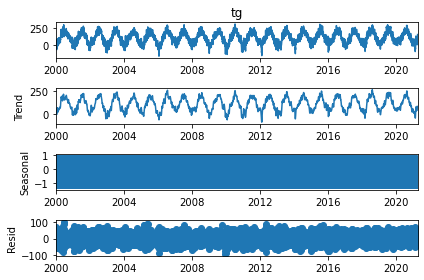

In [70]:
d.plot()